##**Import Libraries and load data**

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aerofit_treadmill.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [145]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [146]:
data.shape

(180, 9)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [148]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [149]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [150]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [151]:
data['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [152]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [153]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [154]:
data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [155]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

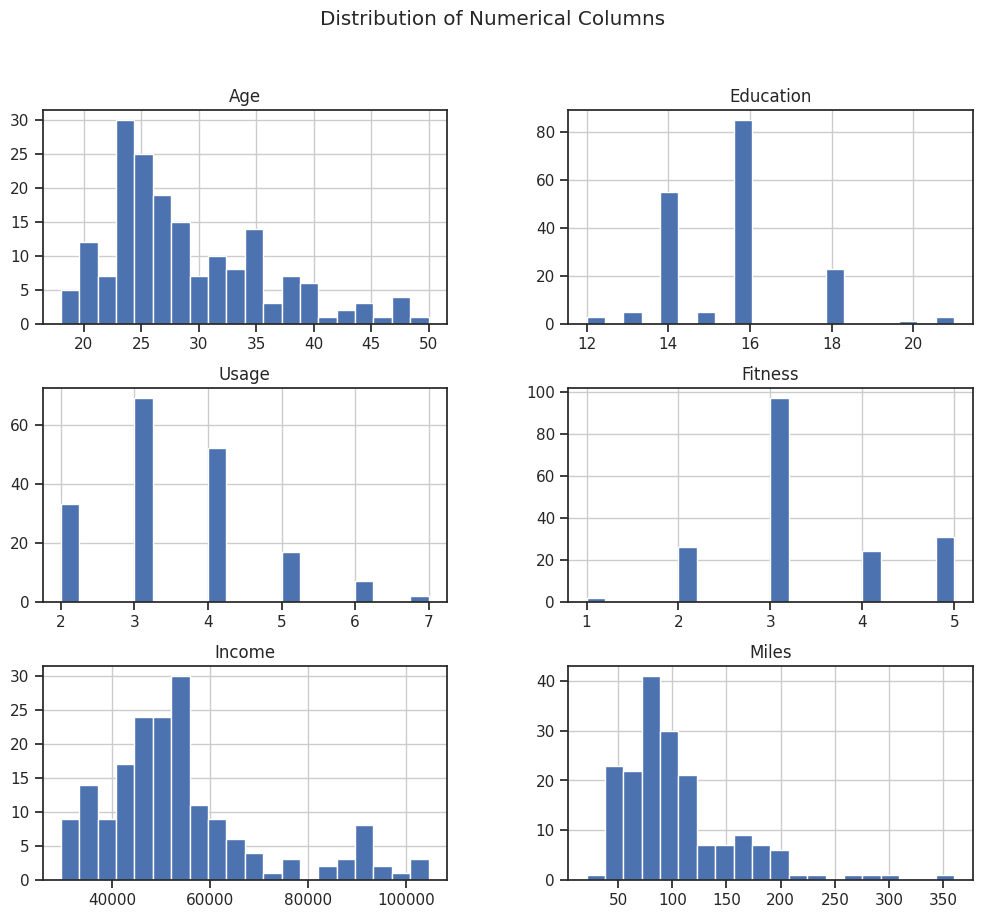

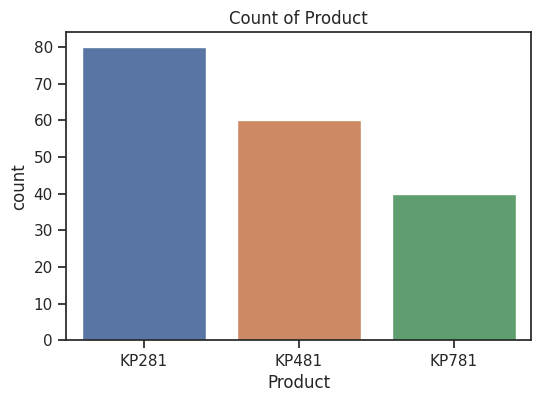

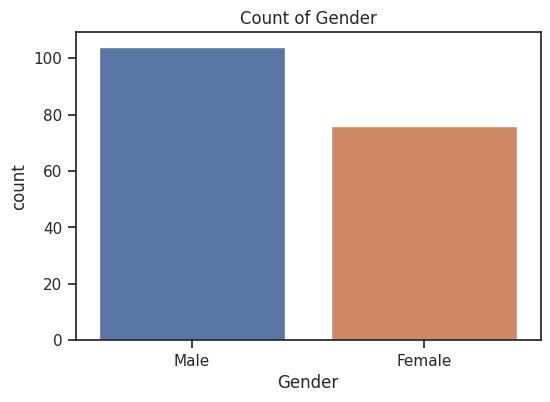

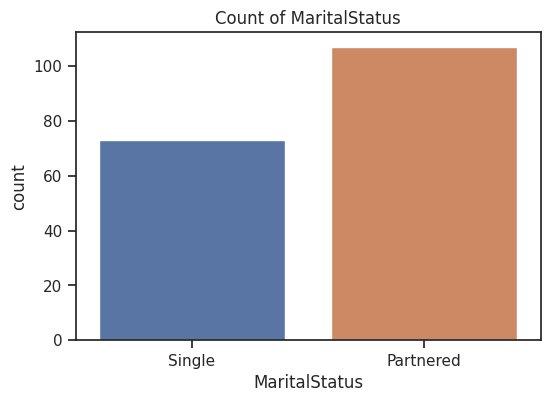

In [156]:
# Visualize the distribution of numerical columns using histograms
data.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

# Visualize the count of categorical columns using bar plots

plt.figure(figsize=(6, 4))
sns.countplot(x='Product', data=data)
plt.title('Count of Product')

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')

plt.figure(figsize=(6, 4))
sns.countplot(x='MaritalStatus', data=data)
plt.title('Count of MaritalStatus')
plt.show()

### Insights :-


*   There are complete 180 rows of data in 9 columns
*   There are no NA/Null values and so Data Cleanup is not required
*   All the columns are in proper data format (Integers as int, Strings as object) and so no requirement of data conversions/type casting
*   KP281 is the most used product by customers compared to other products.
*   We can see more male customers compared to female customers.
*   Marital status impacts product purchases, as we can see more couples are buying compared to singles
*   Most of the customers have an income of less than 60k.
*   Most of the customers have a fitness level of 3.0
*   People within the age group of 23 to 35 are more in number.

















##**2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**

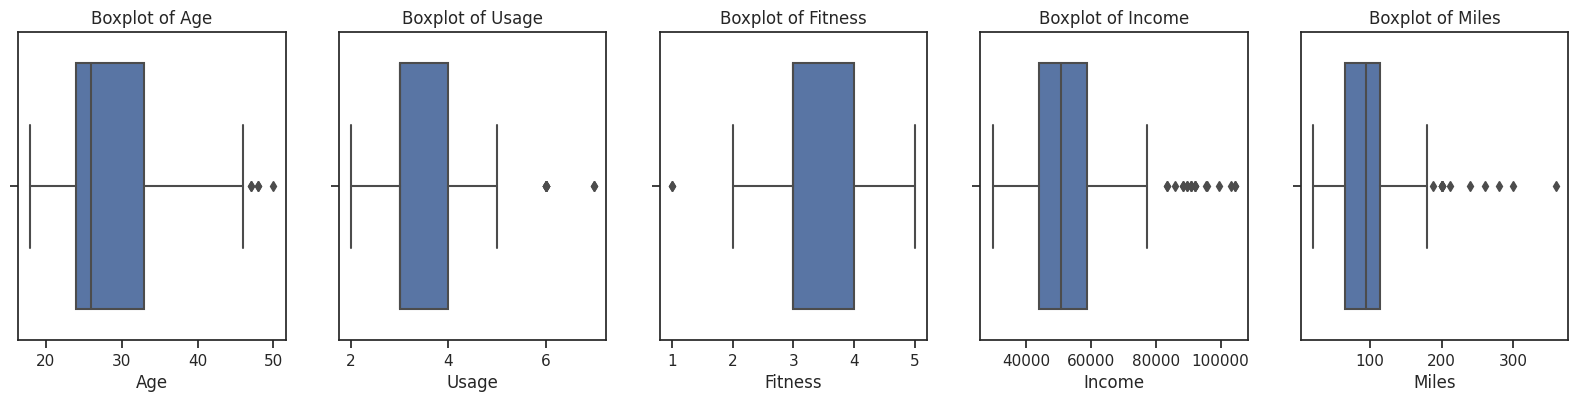



Difference between Mean and Median for Numerical Columns (from describe method):

      Column          Mean   Median   Difference
0        Age     28.788889     26.0     2.788889
1  Education     15.572222     16.0    -0.427778
2      Usage      3.455556      3.0     0.455556
3    Fitness      3.311111      3.0     0.311111
4     Income  53719.577778  50596.5  3123.077778
5      Miles    103.194444     94.0     9.194444


In [157]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 5, 1)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 5, 2)
sns.boxplot(x=data['Usage'])
plt.title('Boxplot of Usage')

plt.subplot(1, 5, 3)
sns.boxplot(x=data['Fitness'])
plt.title('Boxplot of Fitness')

plt.subplot(1, 5, 4)
sns.boxplot(x=data['Income'])
plt.title('Boxplot of Income')

plt.subplot(1, 5, 5)
sns.boxplot(x=data['Miles'])
plt.title('Boxplot of Miles')

plt.show()


# Get summary statistics using the describe method
describe_stats = data.describe()

# Calculate the difference between mean and median for each numerical column
difference_info = []
for column in describe_stats.columns:
    mean_value = describe_stats.loc['mean', column]
    median_value = describe_stats.loc['50%', column]  # 50% corresponds to the median in the describe method output
    difference = mean_value - median_value
    difference_info.append({'Column': column, 'Mean': mean_value, 'Median': median_value, 'Difference': difference})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(difference_info)

print("\n\nDifference between Mean and Median for Numerical Columns (from describe method):\n")
print(df)

### Insights :-


*   Most of the people are within the age group of 23 to 35 and we can observe there were few outliers within 45 to 50.
*   Most people are using the treadmill 3 to 4 times a week. There were few outlier customers using 6 to 7 times a week.
*   Most people have a fitness level between 3 to 4 and there were few outlier customers with fitness level 1.
*   Most people have an income between 40-60k. However there are few outlier customers having an income of more than 80k.
*   Mean and median have slight differences in all the columns except for Income.


















##**3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

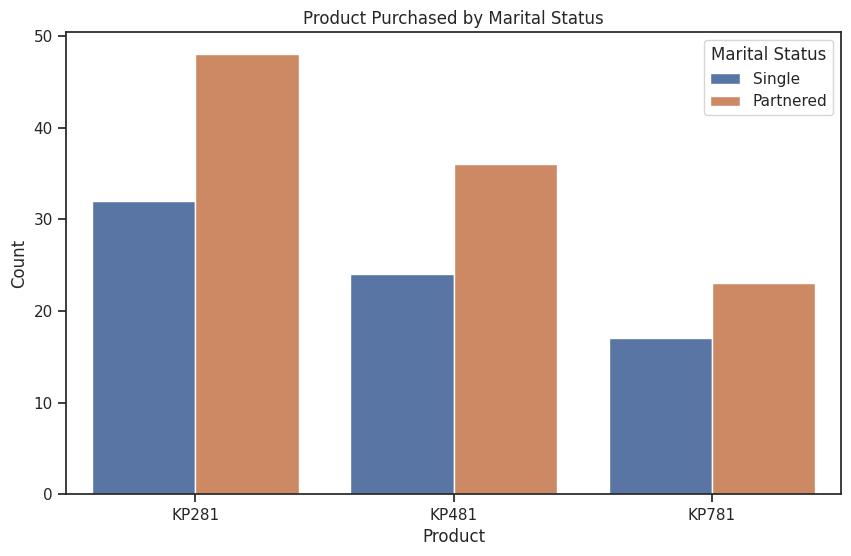

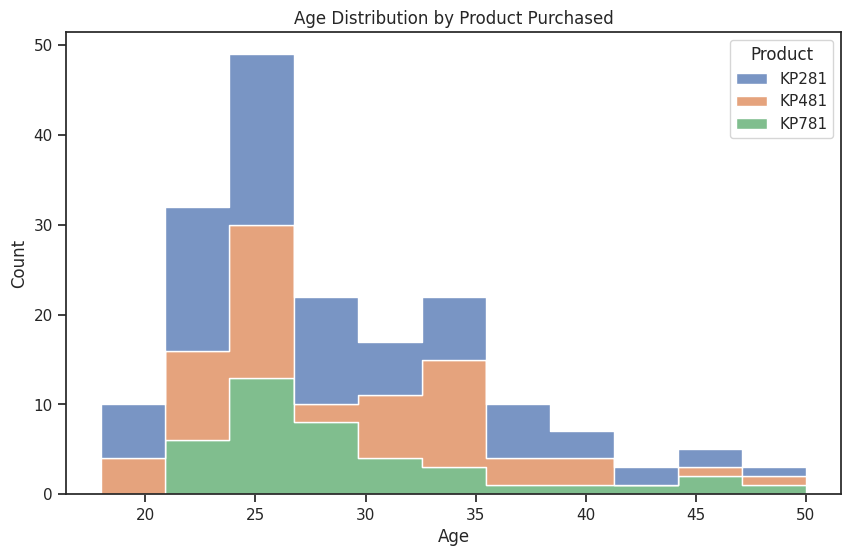

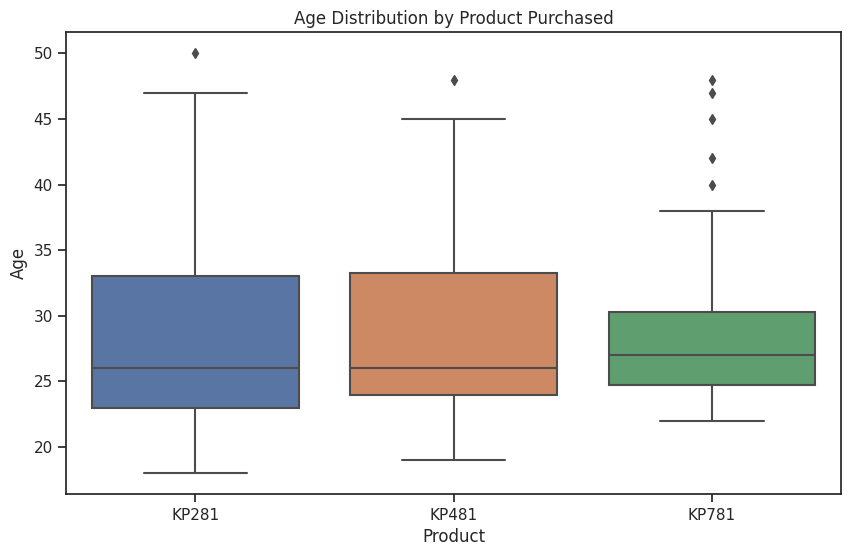

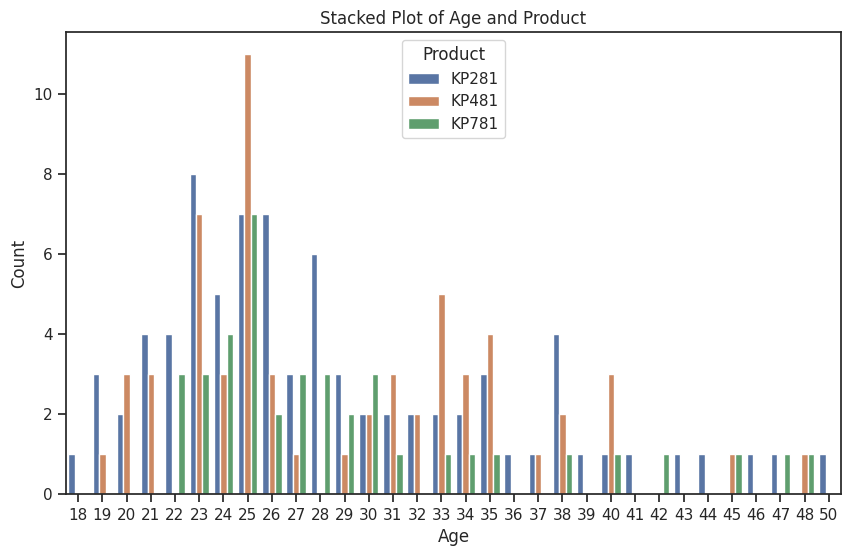

In [158]:
# Countplot for Product and MaritalStatus
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.title('Product Purchased by Marital Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

# Histogram for Age by Product
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Product', multiple='stack', element='step', common_norm=False)
plt.title('Age Distribution by Product Purchased')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot for Age by Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='Age', data=data)
plt.title('Age Distribution by Product Purchased')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

grouped_data = data.groupby(['Age', 'Product']).size().reset_index(name='Count')
# Stack plot for Age and Product with Product as hue
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Age', y='Count', hue='Product', dodge=True)
plt.title('Stacked Plot of Age and Product')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()

### Insights :-


*   Marital status impacts product purchases, as we can see more couples are buying compared to singles
*   Age also impacts product purchases, as we can see people in their 20s to 30s are more ready to buy compared with people in their 50s or more.
*   KP281 and KP481 have similar purchase rates and have a wide range of customers compared with KP781.














##**4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)**

In [159]:
# Calculate marginal probabilities using pandas.crosstab
marginal_probabilities = pd.crosstab(index=data['Product'], columns='Percentage', normalize=True) * 100

# Display the table with marginal probabilities
print("Marginal Probability Table (in percentage):\n")
print(marginal_probabilities)

Marginal Probability Table (in percentage):

col_0    Percentage
Product            
KP281     44.444444
KP481     33.333333
KP781     22.222222


### Insights :-


*   The marginal probability of purchasing KP281,KP481 and KP781 treadmills are 44.4%, 33.3% and 22.2% respectively.














##**5. Check correlation among different factors using heat maps or pair plots.**

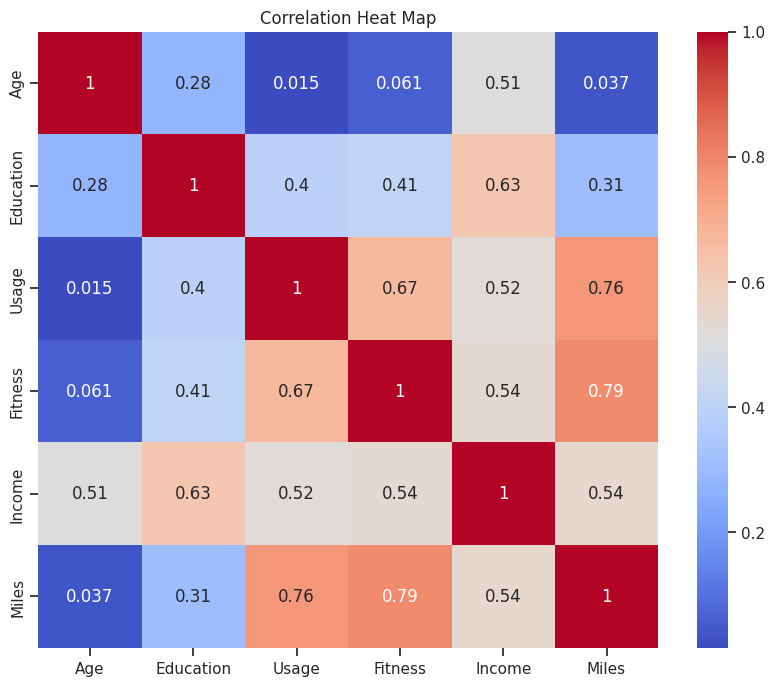

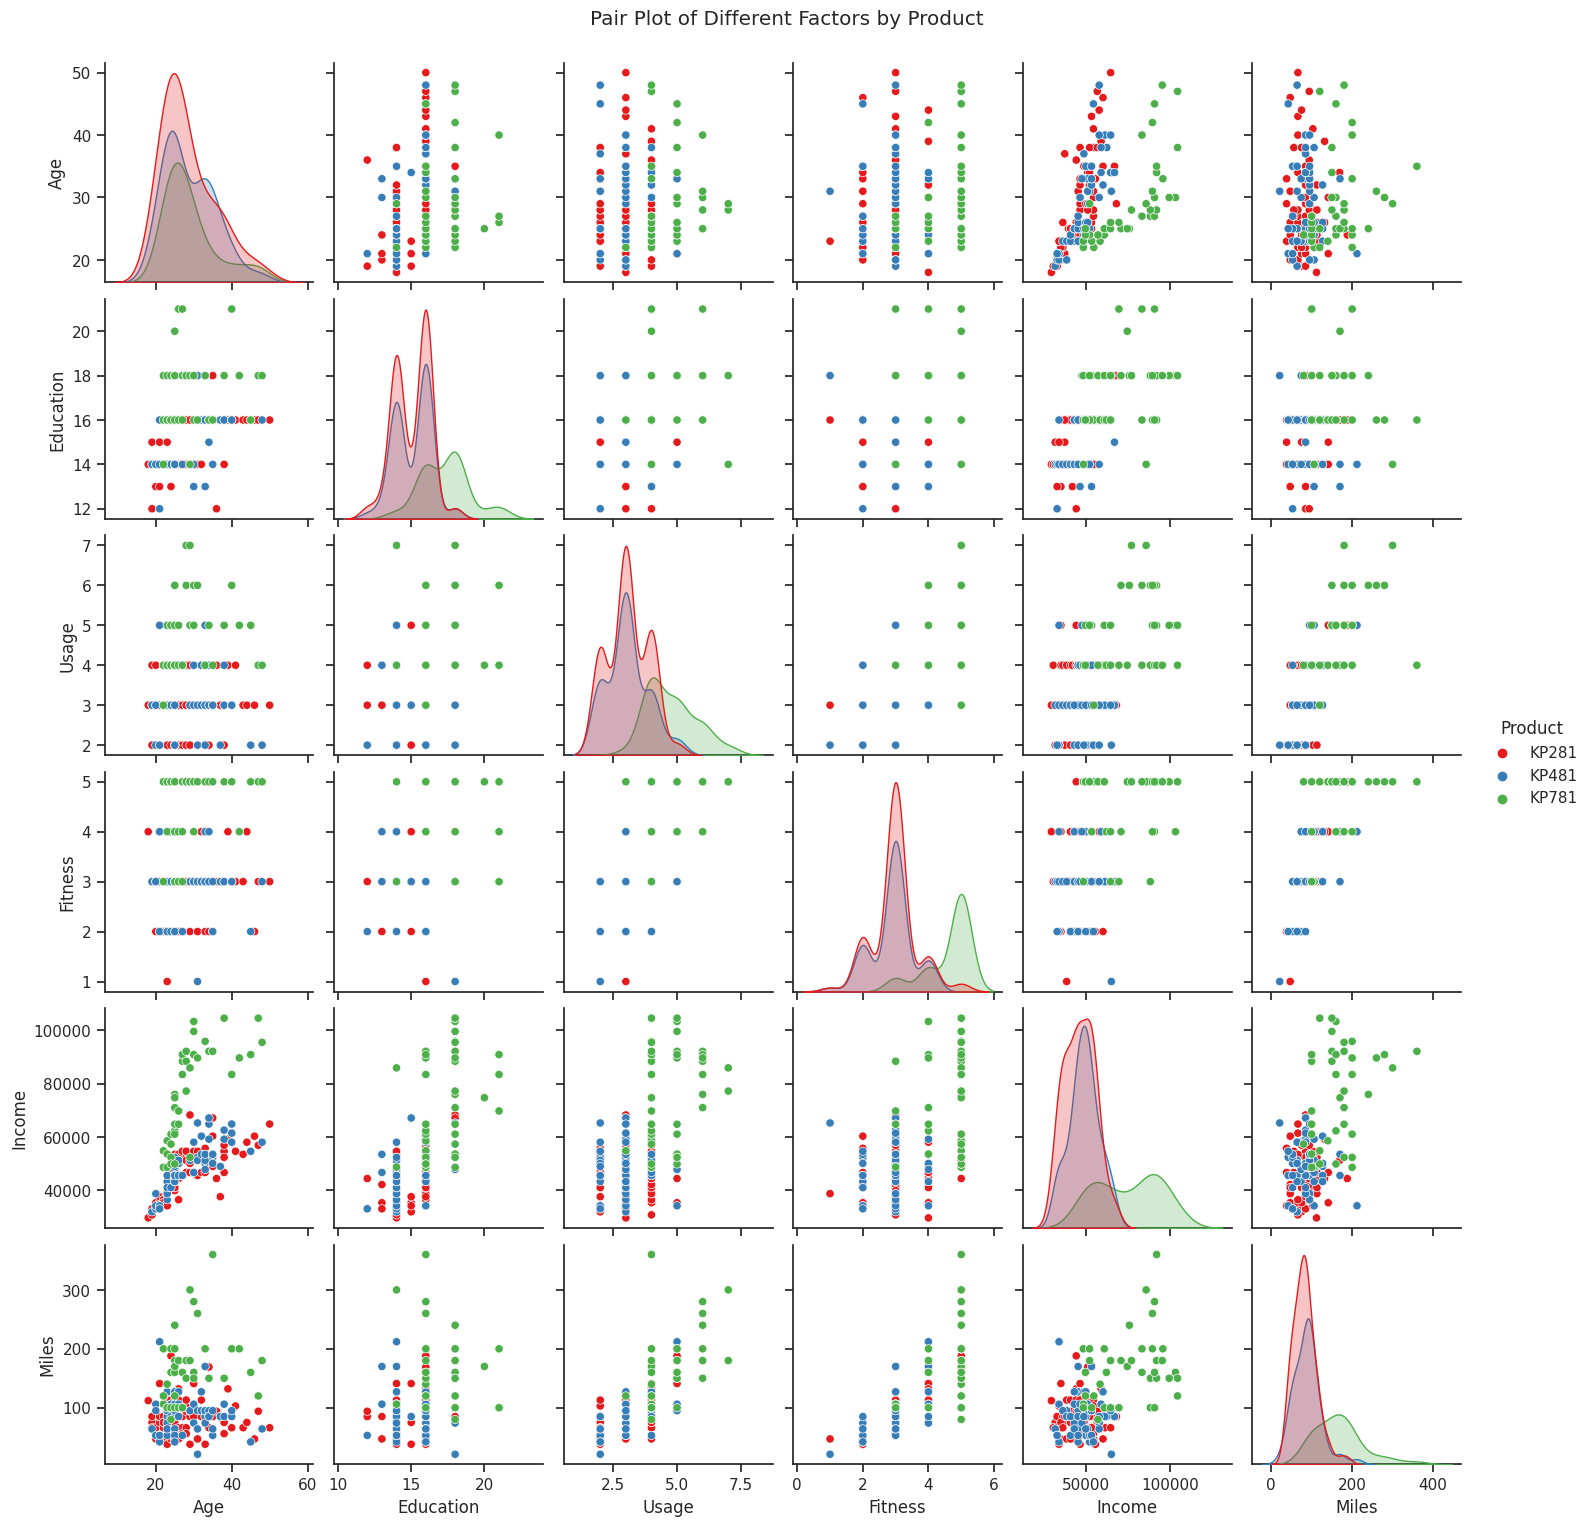

In [160]:
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(data=data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

# Set up the pair plot
sns.set(style="ticks")
sns.pairplot(data, hue="Product", palette="Set1")
plt.suptitle("Pair Plot of Different Factors by Product", y=1.02)
plt.show()

##**6. What is the probability of a male customer buying a KP781 treadmill?**

Probability of a male customer buying a KP781 treadmill: 0.3173076923076923 




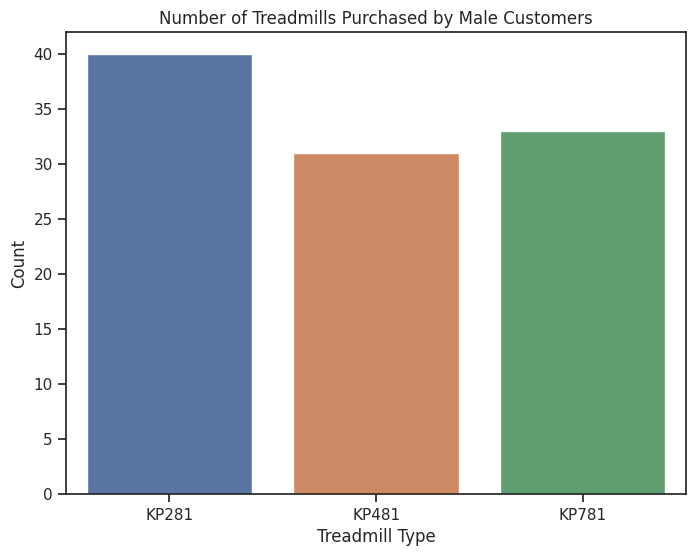

In [161]:
# Create a bar plot for different treadmill types purchased by male customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Product', data=data.loc[data['Gender'] == 'Male'])
plt.title('Number of Treadmills Purchased by Male Customers')
plt.xlabel('Treadmill Type')
plt.ylabel('Count')

# Calculate the total number of male customers
male_customers = len(data.loc[data['Gender'] == 'Male'])

# Calculate the number of male customers who bought KP781 treadmill
male_customers_KP781 = len(data.loc[(data['Gender'] == 'Male') & (data['Product'] == 'KP781')])

# Calculate the probability of a male customer buying a KP781 treadmill
probability_male_KP781 = male_customers_KP781 / male_customers

print("Probability of a male customer buying a KP781 treadmill:", probability_male_KP781,"\n\n")

plt.show()

### Insights :-


*   Probability of a male customer buying a KP781 treadmill: 0.31














##**7. Customer Profiling - Categorization of users.**

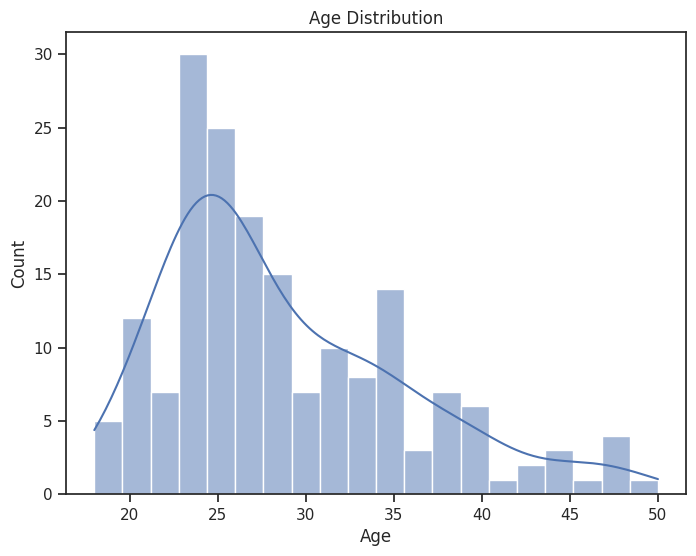

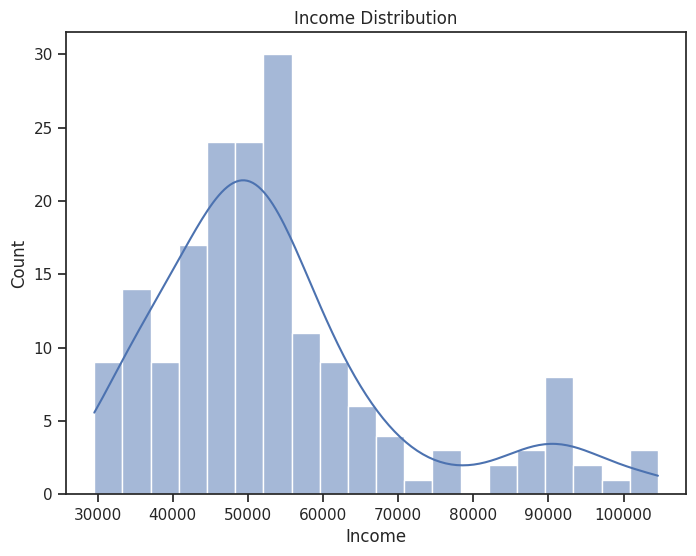

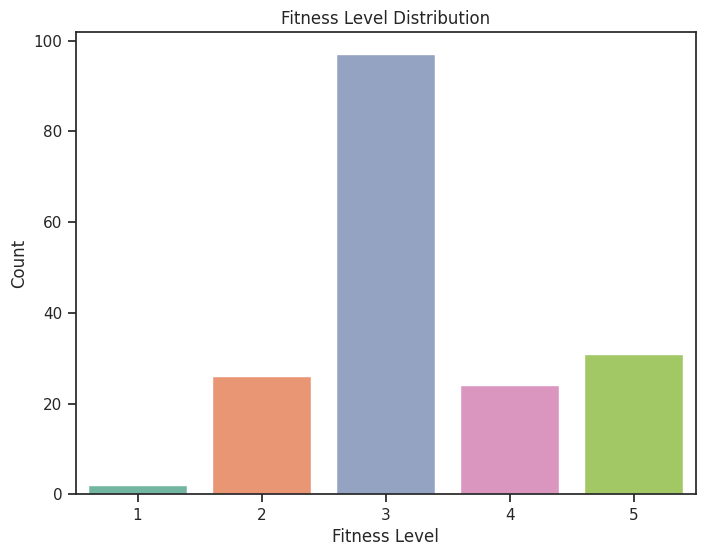

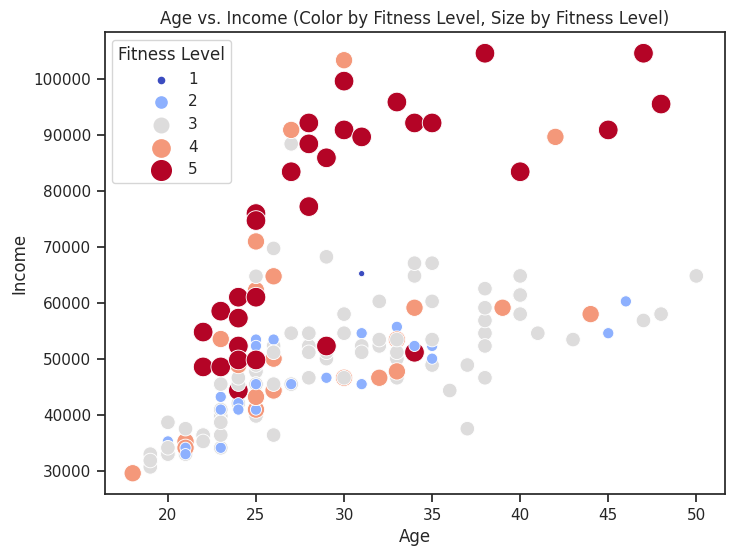

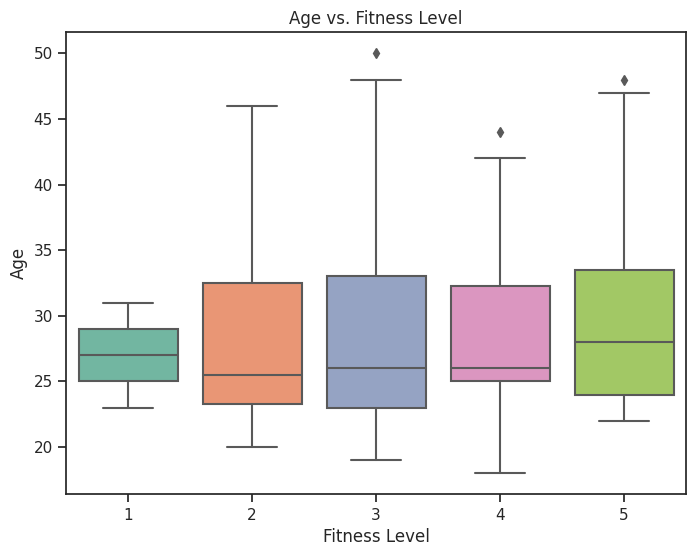

In [162]:
# Plot the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Plot the fitness level distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Fitness', palette='Set2')
plt.title('Fitness Level Distribution')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.show()

# Scatter plot for Age vs. Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Income', hue='Fitness', palette='coolwarm', size='Fitness', sizes=(20, 200))
plt.title('Age vs. Income (Color by Fitness Level, Size by Fitness Level)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Fitness Level')
plt.show()

# Box plot for Age vs. Fitness Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fitness', y='Age', palette='Set2')
plt.title('Age vs. Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Age')
plt.show()

### Insights :-


*   Most of the people are within the age group of 23 to 35.
*   Most people are having an income between 30k to 70k.
*   Most people have a fitness level 3 irrespective of their age














##**8. Probability - marginal, conditional probability.**

In [163]:
# Total number of customers
total_customers = len(data)

# Unique product types
unique_products = data['Product'].unique()

# Calculate and print marginal and conditional probabilities for each product
for product in unique_products:
    # Marginal Probability of buying the current product
    marginal_probability_product = np.round(len(data[data['Product'] == product]) / total_customers,2)

    # Conditional Probability of buying the current product given that the customer is male
    male_customers = len(data[data['Gender'] == 'Male'])
    male_customers_buying_product = len(data[(data['Gender'] == 'Male') & (data['Product'] == product)])
    conditional_probability_product_given_male = np.round(male_customers_buying_product / male_customers,2)

    # Conditional Probability of buying the current product given that the customer is female
    female_customers = len(data[data['Gender'] == 'Female'])
    female_customers_buying_product = len(data[(data['Gender'] == 'Female') & (data['Product'] == product)])
    conditional_probability_product_given_female = np.round(female_customers_buying_product / female_customers,2)

    print(f"Product: {product}")
    print(f"Marginal Probability of buying {product}: {marginal_probability_product}")
    print(f"Conditional Probability of buying {product} given that the customer is male: {conditional_probability_product_given_male}")
    print(f"Conditional Probability of buying {product} given that the customer is female: {conditional_probability_product_given_female}")
    print("----")


Product: KP281
Marginal Probability of buying KP281: 0.44
Conditional Probability of buying KP281 given that the customer is male: 0.38
Conditional Probability of buying KP281 given that the customer is female: 0.53
----
Product: KP481
Marginal Probability of buying KP481: 0.33
Conditional Probability of buying KP481 given that the customer is male: 0.3
Conditional Probability of buying KP481 given that the customer is female: 0.38
----
Product: KP781
Marginal Probability of buying KP781: 0.22
Conditional Probability of buying KP781 given that the customer is male: 0.32
Conditional Probability of buying KP781 given that the customer is female: 0.09
----


### Insights :-


*   Marginal Probability of buying KP281: 0.44
*   Conditional Probability of buying KP281 given that the customer is male: 0.38
*   Conditional Probability of buying KP281 given that the customer is female: 0.53
*   Marginal Probability of buying KP481: 0.33
*   Conditional Probability of buying KP481 given that the customer is male: 0.3
*   Conditional Probability of buying KP481 given that the customer is female: 0.38
*   Marginal Probability of buying KP781: 0.22
*   Conditional Probability of buying KP781 given that the customer is male: 0.32
*   Conditional Probability of buying KP781 given that the customer is female: 0.09







##**More Analysis**

###**Income vs Product**

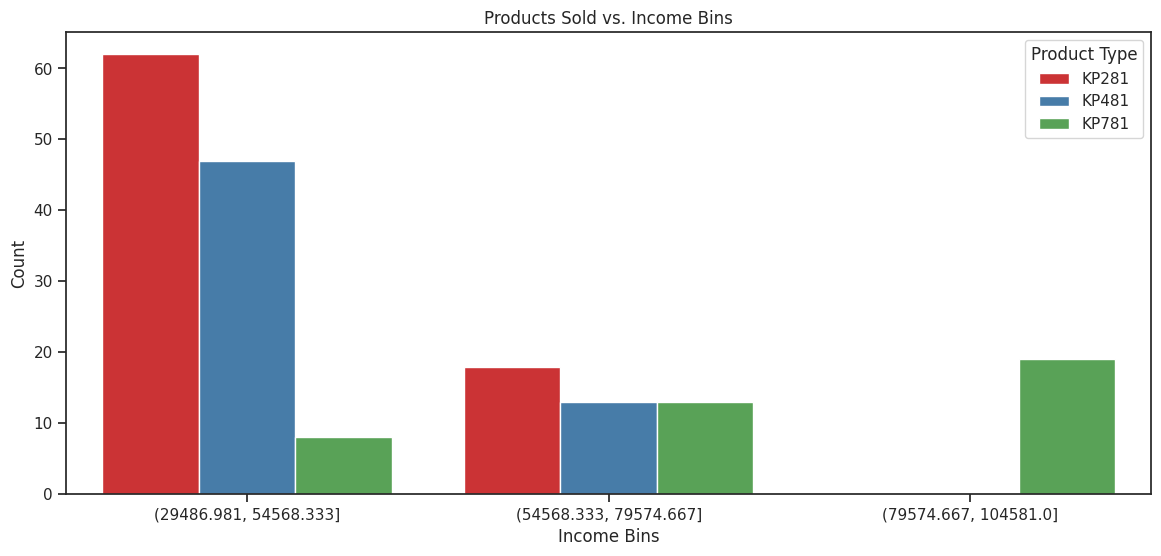

In [164]:
# Create 3 equal bins for income
data['Income Bins'] = pd.cut(data['Income'], bins=3)

# Set up the countplot
plt.figure(figsize=(14, 6))
sns.countplot(x='Income Bins', data=data, hue='Product', palette='Set1')
plt.title('Products Sold vs. Income Bins')
plt.xlabel('Income Bins')
plt.ylabel('Count')
plt.legend(title='Product Type')
plt.show()

###**Age vs Product**

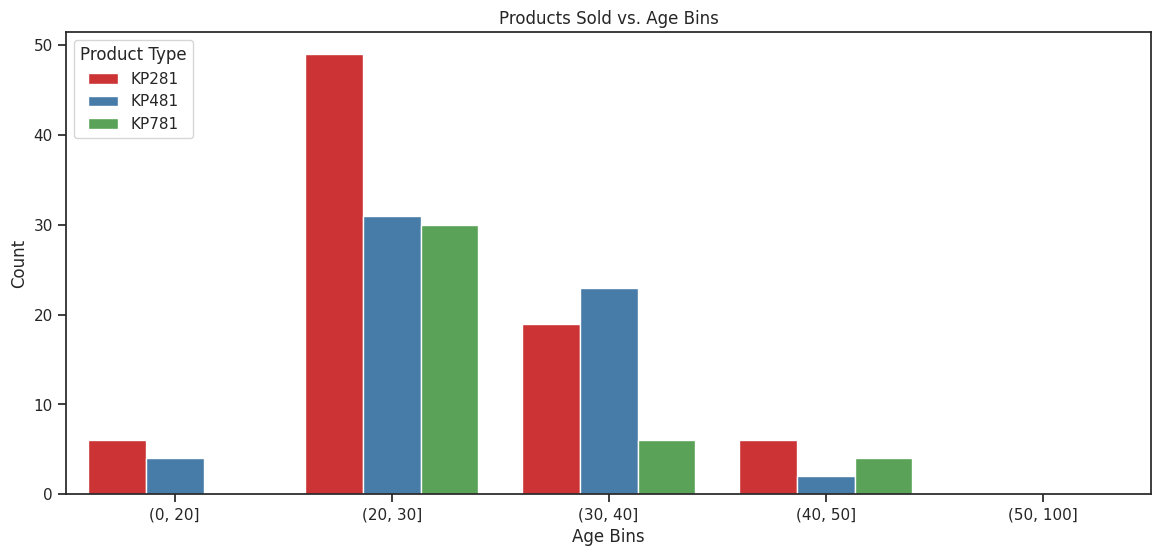

In [165]:
age_bins = [0, 20, 30, 40, 50, 100]

data['Age Bins'] = pd.cut(data['Age'], bins=age_bins)

# Set up the countplot
plt.figure(figsize=(14, 6))
sns.countplot(x='Age Bins', data=data, hue='Product', palette='Set1')
plt.title('Products Sold vs. Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.legend(title='Product Type')
plt.show()

###**Gender vs Product**

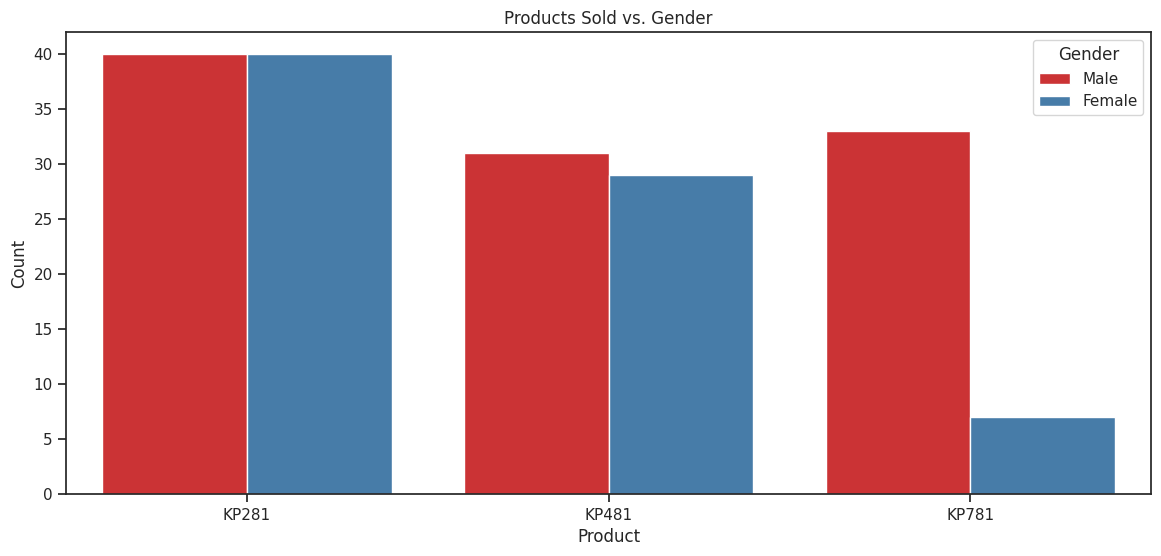

In [166]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Product', data=data, hue='Gender', palette='Set1')
plt.title('Products Sold vs. Gender')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

###**Miles vs Product**

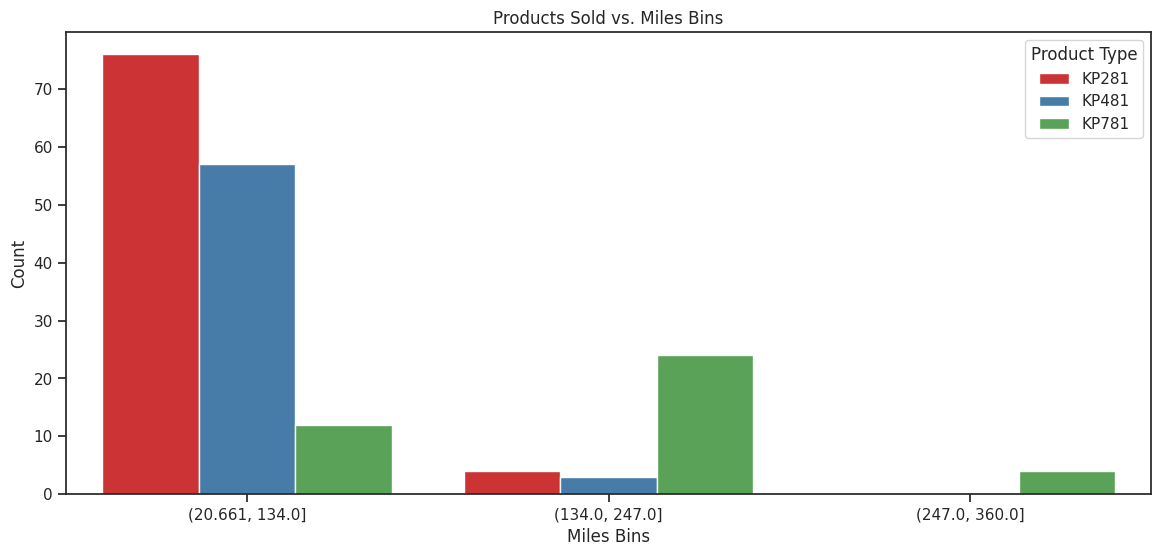

In [167]:
# Create 3 equal bins for Miles
data['Miles Bins'] = pd.cut(data['Miles'], bins=3)

# Set up the countplot
plt.figure(figsize=(14, 6))
sns.countplot(x='Miles Bins', data=data, hue='Product', palette='Set1')
plt.title('Products Sold vs. Miles Bins')
plt.xlabel('Miles Bins')
plt.ylabel('Count')
plt.legend(title='Product Type')
plt.show()

###**Distplot and Kdeplot of product against Age, Income**

<Figure size 800x600 with 0 Axes>

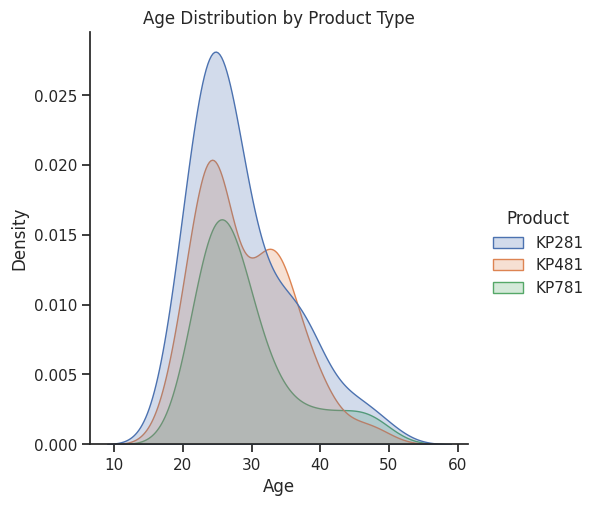

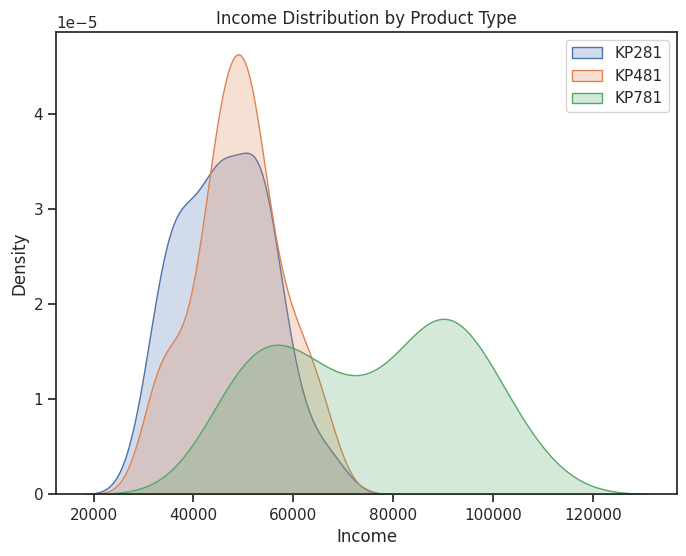

In [168]:
# Plot Distplot for 'Age' based on different 'Product' types using displot
plt.figure(figsize=(8, 6))
sns.displot(data=data, x='Age', hue='Product', kind='kde', fill=True)
plt.title('Age Distribution by Product Type')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Plot Distplot for 'Income' based on different 'Product' types using kdeplot
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Product'] == 'KP281']['Income'], fill=True, label='KP281')
sns.kdeplot(data[data['Product'] == 'KP481']['Income'], fill=True, label='KP481')
sns.kdeplot(data[data['Product'] == 'KP781']['Income'], fill=True, label='KP781')
plt.title('Income Distribution by Product Type')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()

##**9. Some recommendations and actionable insights, based on the inferences.**

### Insights & Recommendations:-


*   KP281 treadmill is the most popular product, purchased by 80 customers.
*   KP481 and KP781 treadmills are also favoured, with 60 and 40 customers respectively.
*   We can see more male customers compared to female customers.
*   Marital status impacts product purchases, as we can see more couples are buying compared to singles
*   Most of the customers have an income of less than 60k.
*   Most of the customers have a fitness level of 3.0
*   People within the age group of 23 to 35 are more in number.
*   People with higher income(greater than 75k) are only purchasing advanced treadmill(KP781).
*   Entry-level treadmill(KP281) is being used by both males and females equally whereas advanced treadmill(KP781) is mostly used by males only.
*   Average usage sessions per week range from 2 to 7, with a mean of 3.5 sessions.
*   By providing student discounts we can get more customers for entry-level treadmill.
*   From the given data it seems that high-income customers are only opting for advanced-level treadmills, so the company can also think of providing seasonal discounts to attract mid-level income customers.
*   Providing personalized workout plans and nutrition guidance can get more customers.
*   Since the majority of customers (107 out of 180) are partnered, suggesting potential family-oriented marketing strategies.


